In [17]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from numpy import reshape
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib import pyplot



In [15]:
n_dimensions = 2
data_path = './dataset/{0}'
testX_faces = data['arr_2']

### import data 

In [4]:
# load dataset
data = load(data_path.format('5-celebrity-faces-dataset_1.npz'))
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# print(data.shape)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)


Dataset: train=93, test=25
(93, 160, 160, 3)
(93,)
(25, 160, 160, 3)
(25,)


In [5]:
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
print(trainy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [6]:
print( data['arr_0'])
print( data['arr_1'])
print( data['arr_2'])
print( data['arr_3'])

[[[[ 25  32  38]
   [ 31  35  42]
   [ 42  45  52]
   ...
   [ 86  76  73]
   [102  93  88]
   [110 101  96]]

  [[ 24  29  35]
   [ 30  34  39]
   [ 41  44  49]
   ...
   [ 71  62  59]
   [ 83  75  70]
   [ 89  81  76]]

  [[ 21  24  30]
   [ 26  30  34]
   [ 37  41  44]
   ...
   [ 50  42  39]
   [ 55  48  43]
   [ 58  51  44]]

  ...

  [[253 254 246]
   [253 254 246]
   [253 254 247]
   ...
   [ 57  62  57]
   [ 66  71  65]
   [ 70  75  69]]

  [[253 254 246]
   [253 254 246]
   [253 254 246]
   ...
   [ 55  60  55]
   [ 68  73  67]
   [ 74  79  73]]

  [[253 254 246]
   [253 254 246]
   [253 254 246]
   ...
   [ 56  61  56]
   [ 70  75  70]
   [ 78  83  77]]]


 [[[ 75  54  37]
   [ 73  52  35]
   [ 70  49  32]
   ...
   [ 15  16   2]
   [ 23  24  11]
   [ 29  29  17]]

  [[ 77  56  39]
   [ 73  52  35]
   [ 69  48  31]
   ...
   [ 15  14   2]
   [ 19  18   6]
   [ 20  20   8]]

  [[ 74  53  36]
   [ 71  50  33]
   [ 66  45  28]
   ...
   [ 19  15   3]
   [ 18  16   4]
   [ 17  16

### Reshape training set

In [7]:
nsamples, nx, ny, dim = trainX.shape
trainX = trainX.reshape((nsamples, nx * ny * dim ))
print(trainX.shape)

(93, 76800)


In [8]:
nsamples, nx, ny, dim = testX.shape
testX = testX.reshape((nsamples, nx * ny * dim ))
print(testX.shape)

(25, 76800)


In [9]:
pca = PCA(n_components=n_dimensions)
reducted_trainX = pca.fit_transform(trainX)
reducted_testX = pca.fit_transform(testX)



In [10]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)


### Classifying

In [11]:
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=46.237, test=32.000


Predicted: jerry_seinfeld (26.509)
Expected: mindy_kaling


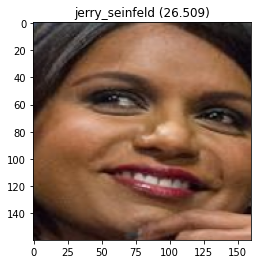

In [18]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()